In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import decimal
import mne


In [2]:
%matplotlib notebook

plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['font.size'] = 12

#### reading data

In [3]:
txt_file='Project files/sz1.txt'

data = np.loadtxt(txt_file)

data = data.transpose()

n_channels = data.shape[0]

#### dc offset

In [4]:
data=data-(sum(data)/n_channels)

In [5]:
#eeg data file

sr = 500

ch_types = ['eeg'] * n_channels
info = mne.create_info(n_channels,sfreq=sr)
picks=info["ch_names"]

raw = mne.io.RawArray(data, info, verbose=True)

Creating RawArray with float64 data, n_channels=32, n_times=200963
    Range : 0 ... 200962 =      0.000 ...   401.924 secs
Ready.


Using matplotlib as 2D backend.


<IPython.core.display.Javascript object>


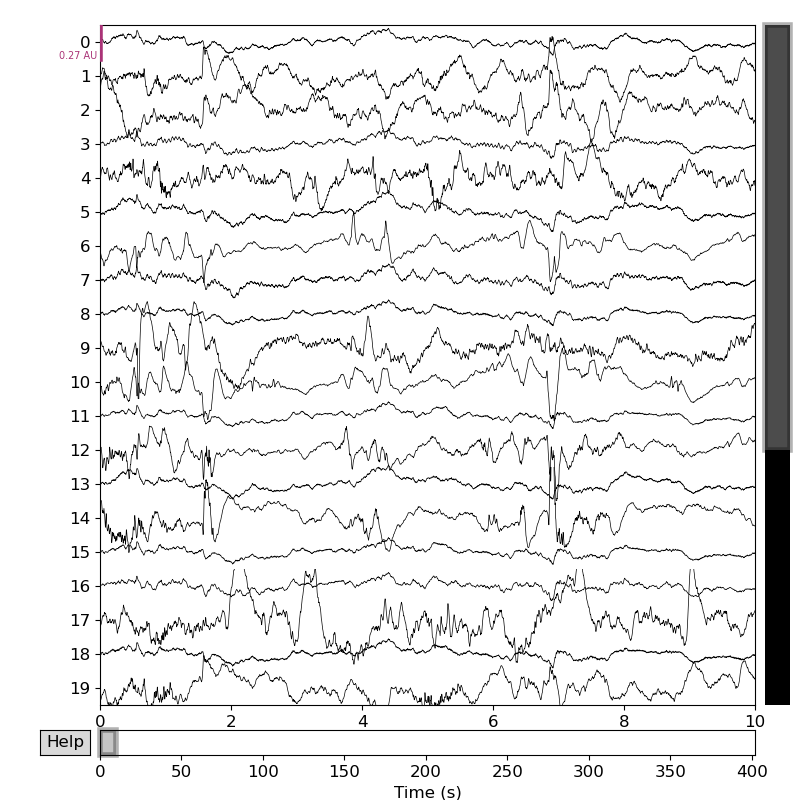

In [6]:
#plotting
raw.plot();

<IPython.core.display.Javascript object>


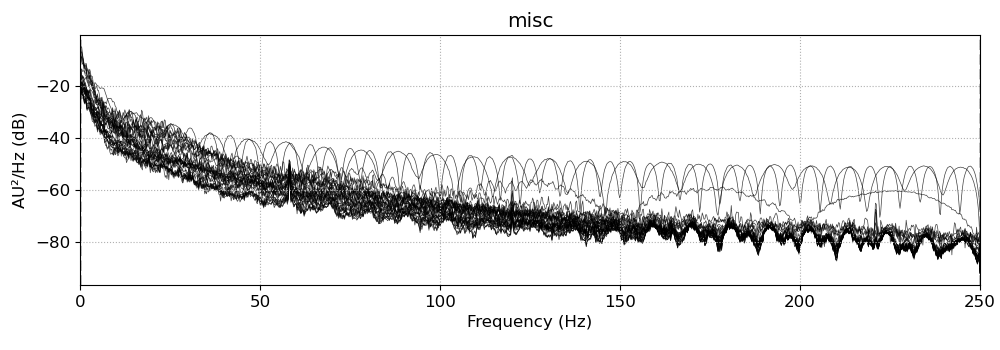

Effective window size : 4.096 (s)


In [7]:
raw.plot_psd(picks=picks, spatial_colors=False);

#### FILTERING

In [8]:
raw.filter(0.5, 35, l_trans_bandwidth='auto', h_trans_bandwidth='auto',
           filter_length='auto', phase='zero',picks=picks);

No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 3301 samples (6.602 sec)



<IPython.core.display.Javascript object>


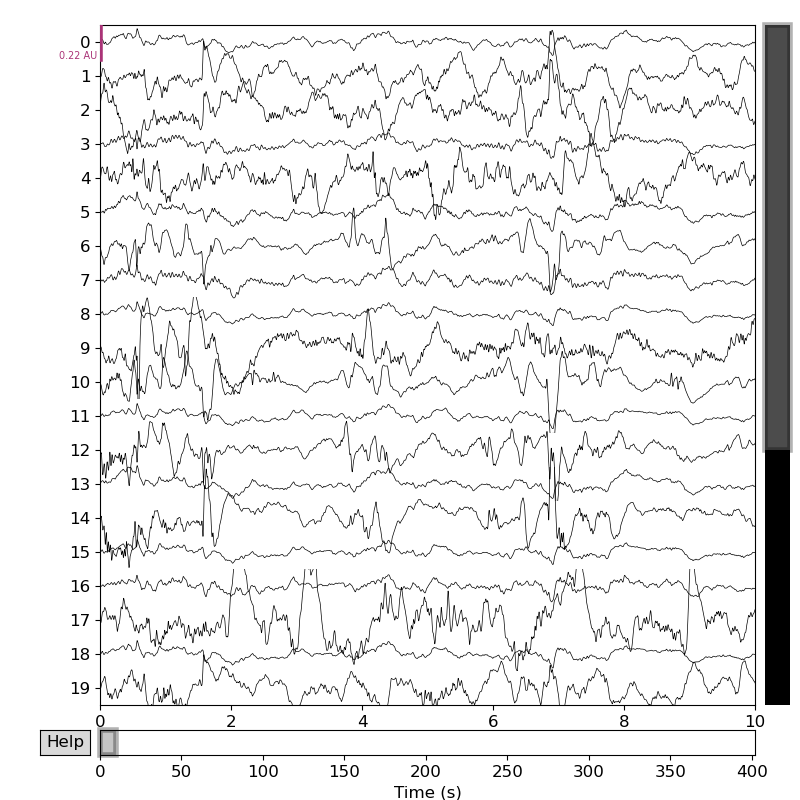

In [9]:
raw.plot();

<IPython.core.display.Javascript object>


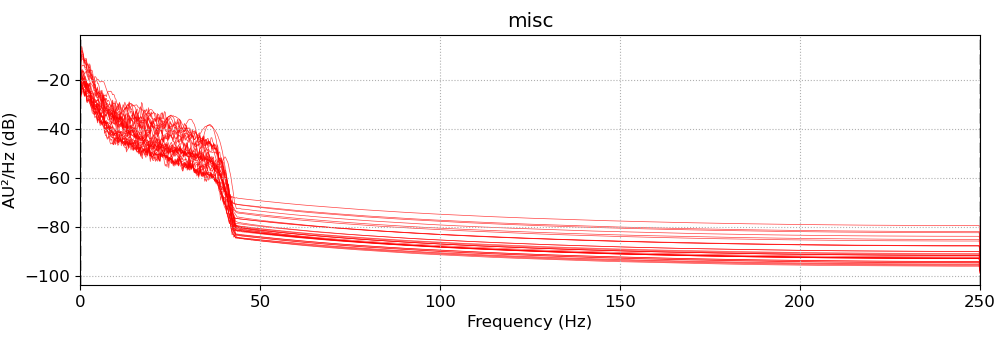

Effective window size : 4.096 (s)


In [10]:
raw.plot_psd(picks=picks,color='red',spatial_colors=False);

In [11]:
#filtered data
Fdata,Ftimes = raw[:] 

#### PCA

In [12]:
from sklearn.decomposition import PCA

n=3
pca = PCA(n_components=n) #using  n components
pca.fit(Fdata)
x_pca = pca.transform(Fdata)

#signal reconstruction with pca
pData = pca.inverse_transform(x_pca)

Creating RawArray with float64 data, n_channels=32, n_times=200963
    Range : 0 ... 200962 =      0.000 ...   401.924 secs
Ready.


<IPython.core.display.Javascript object>


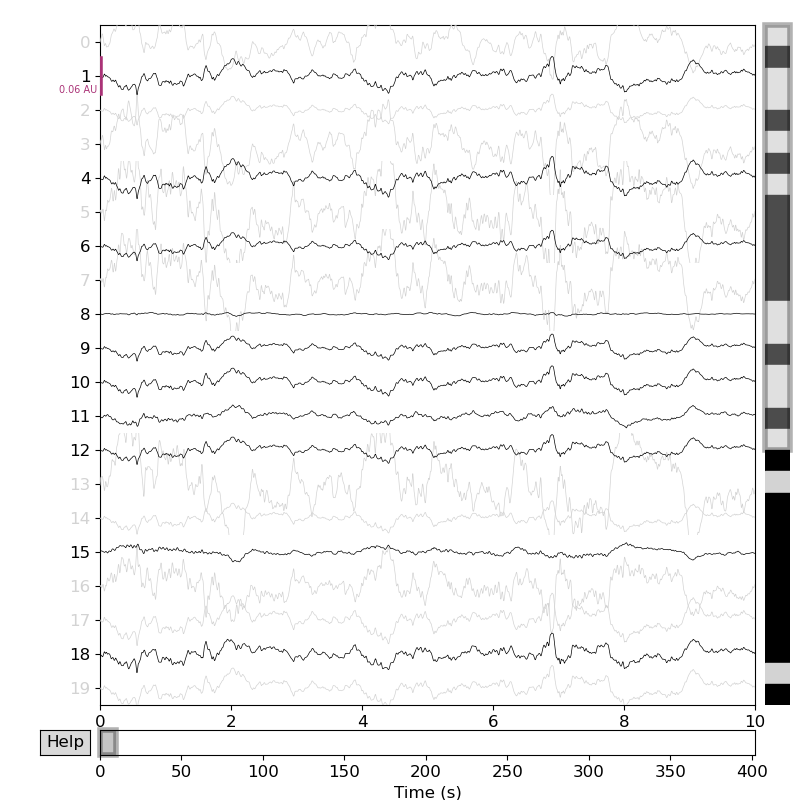

In [13]:
raw = mne.io.RawArray(pData, info, verbose=True)
raw.info['bads'] = ['0','2','3','5','7','13','14','16','17','19','21','30']
raw.plot();

In [14]:
raw.drop_channels(raw.info['bads']);

In [15]:
#Processed data
Pdata,Ptimes = raw[:] 

Creating RawArray with float64 data, n_channels=20, n_times=200963
    Range : 0 ... 200962 =      0.000 ...   401.924 secs
Ready.


<IPython.core.display.Javascript object>


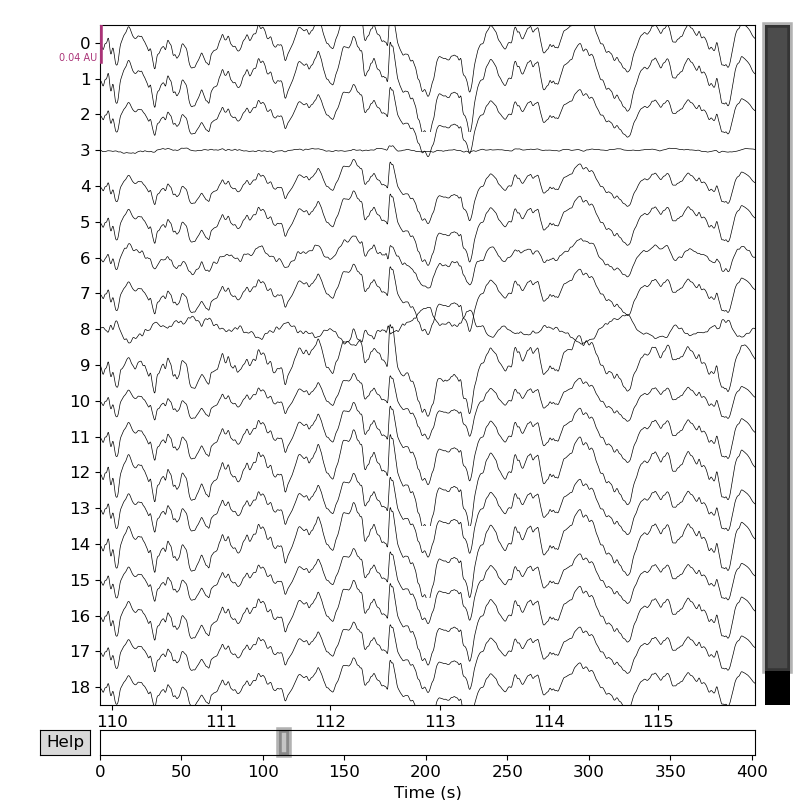

In [19]:
info = mne.create_info(Pdata.shape[0],sfreq=sr)
raw = mne.io.RawArray(Pdata, info, verbose=True)
raw.plot(n_channels=19,duration=6,start=110);

In [17]:
processed_data = pd.DataFrame(Pdata.transpose())
processed_data['time'] = Ptimes

In [18]:
processed_data.to_csv("processed_data.csv", index = False)

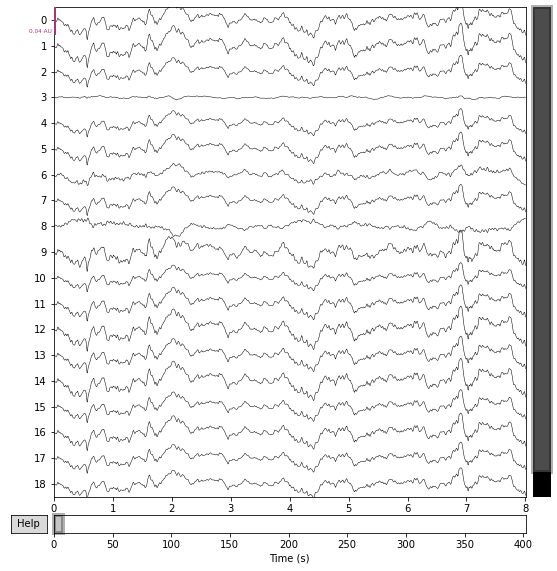

In [26]:
%matplotlib inline
raw.plot(n_channels=19,duration=8,start=0);